# Stock Price Forecasting Using Historical Data and Financial Indicators

## 1. Project Overview

### Understanding the Data
The dataset includes the following columns:

- **Date**: Date of the stock data
- **Open**: Opening price
- **High**: Highest price of the day
- **Low**: Lowest price of the day
- **Close**: Closing price
- **Adj Close**: Adjusted closing price (accounting for corporate actions)
- **Volume**: Number of shares traded


The dataset spans 1258 days, from September 3, 2019, to August 30, 2024.

data source: https://finance.yahoo.com/quote/NDAQ/history/?guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAALB1rZy_4joT3mpo_wfv9r9Vd7iSZNLta4NzV0kttnLWT1eDGj7bGAF8EhCU1EAqQ2GAv5TmEocemroSqvY4ajSEp8hC1rNJs9v43gBU-jLP_SYXRiTkppugoPMYOh1foQDMBABm8hTBG1SvgLyf8k3S7r4oJfvUlIWx2Kyj81GL&guccounter=2&period1=1567241948&period2=1724976000 

## 2. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


## 3. Pipeline

In [2]:
def load_data(filepath):
    """Load the dataset from a CSV file."""
    return pd.read_csv(filepath)

def preprocess_data(df):
    """Preprocess the stock data by converting date columns, creating lag features, and dropping NaN values."""
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # Feature engineering
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Day'] = df.index.day
    df['DayOfWeek'] = df.index.dayofweek
    df['Lag_1'] = df['Close'].shift(1)
    df['Lag_2'] = df['Close'].shift(2)
    df.dropna(inplace=True)
    
    return df

def feature_engineering(df):
    """Create additional financial indicators for the stock data."""
    df['SMA_30'] = df['Close'].rolling(window=30).mean()
    df['EMA_30'] = df['Close'].ewm(span=30, adjust=False).mean()
    df['RSI'] = calculate_rsi(df['Close'])
    return df

def calculate_rsi(data, period=14):
    """Calculate the Relative Strength Index (RSI) for the given data."""
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def train_model(df, target_col='Close'):
    """Train a RandomForestRegressor model on the stock data."""
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return model, mse, r2

def plot_results(df, model, target_col='Close'):
    """Plot actual vs. predicted stock prices."""
    df['Predicted'] = model.predict(df.drop(columns=[target_col]))
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df[target_col], label='Actual')
    plt.plot(df.index, df['Predicted'], label='Predicted', linestyle='--')
    plt.title('Actual vs. Predicted Stock Prices')
    plt.legend()
    plt.show()

## 4. Execution

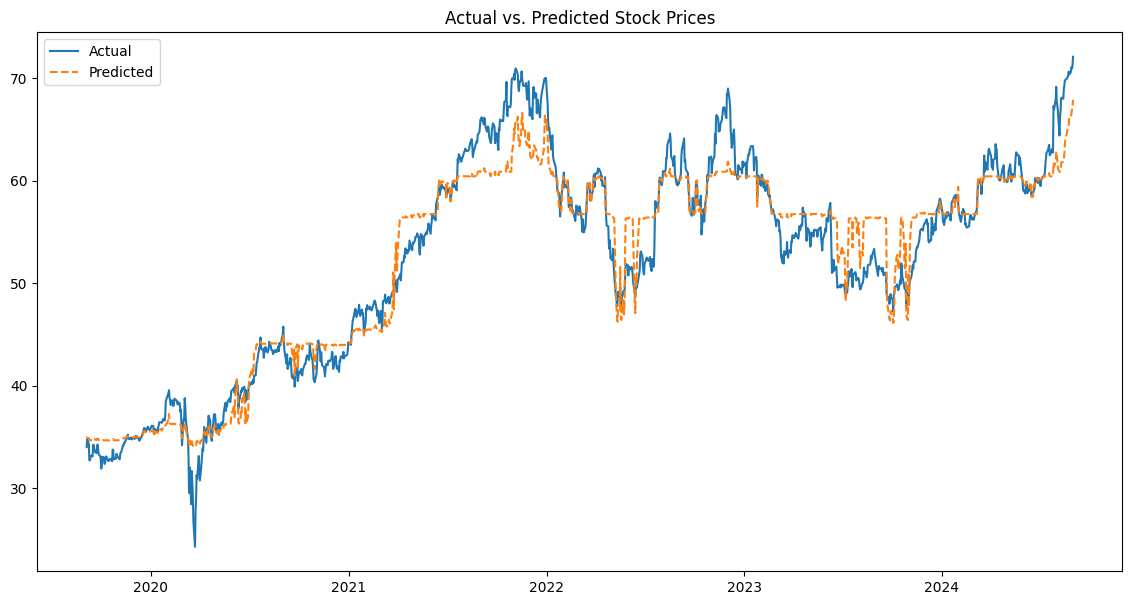

Model MSE: 7.60
Model R-Squared: 0.93


In [3]:
# Pipeline
stock_data = load_data('datasets/NDAQ.csv')
stock_data = preprocess_data(stock_data)
stock_data = feature_engineering(stock_data)
model, mse, r2 = train_model(stock_data)
plot_results(stock_data, model)

print(f'Model MSE: {mse:.2f}')
print(f'Model R-Squared: {r2:.2f}')